In [3]:
import pandas as pd
import numpy as np

In [5]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
index=['Ohio', 'Colorado', 'Utah', 'New York'],
columns=['one', 'two', 'three', 'four'])

In [6]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [7]:
data.loc['Colorado',['two','three']]

two      5
three    6
Name: Colorado, dtype: int32

In [9]:
data.iloc[2,[3,0,1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [10]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [12]:
data.iloc[[1,2],[3,0,1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


In [13]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
columns=list('bde'),
index=['Utah', 'Ohio', 'Texas', 'Oregon'])


In [14]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.00,1.00,2.00
Ohio,3.00,4.00,5.00
Texas,6.00,7.00,8.00
Oregon,9.00,10.00,11.00


In [16]:
frame['e'].map(format)

Utah       2.00
Ohio       5.00
Texas      8.00
Oregon    11.00
Name: e, dtype: object

In [17]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
 'Qu2': [2, 3, 1, 2, 3],
 'Qu3': [1, 5, 2, 4, 4]})

In [18]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
result = data

# Data Loading, Storage and File Formats

In [18]:
!cat examples/ex1.csv
a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


'cat' is not recognized as an internal or external command,
operable program or batch file.


NameError: name 'a' is not defined

In [12]:
import pandas as pd 

In [17]:
 df = pd.read_csv('examples/ex1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'examples/ex1.csv'

In [19]:
#type komutunu çalıştıramadım.

# Data Cleaning and Preparation

### Handling Missing Data

In [21]:
import numpy as np

In [22]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])


In [23]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

### Filtering out Missing Data

In [24]:
df = pd.DataFrame(np.random.randn(7, 3))

In [28]:
from numpy import nan as NA

In [29]:
df.iloc[:4,1] = NA

In [31]:
df.iloc[:2,2] = NA

In [32]:
df

,0,1,2
0,-1.004117,NaN,NaN
1,-0.430108,NaN,NaN
2,-0.487683,NaN,0.451570
3,-1.491276,NaN,-1.469330
4,0.945853,-0.248592,-0.344103
5,-0.669129,0.120711,-0.855967
6,-1.090855,-1.123239,-0.284006


In [33]:
df.dropna

<bound method DataFrame.dropna of           0         1         2
0 -1.004117       NaN       NaN
1 -0.430108       NaN       NaN
2 -0.487683       NaN  0.451570
3 -1.491276       NaN -1.469330
4  0.945853 -0.248592 -0.344103
5 -0.669129  0.120711 -0.855967
6 -1.090855 -1.123239 -0.284006>

In [34]:
df.dropna(thresh = 2 )

,0,1,2
2,-0.487683,NaN,0.451570
3,-1.491276,NaN,-1.469330
4,0.945853,-0.248592,-0.344103
5,-0.669129,0.120711,-0.855967
6,-1.090855,-1.123239,-0.284006


In [35]:
df.fillna(0)

,0,1,2
0,-1.004117,0.000000,0.000000
1,-0.430108,0.000000,0.000000
2,-0.487683,0.000000,0.451570
3,-1.491276,0.000000,-1.469330
4,0.945853,-0.248592,-0.344103
5,-0.669129,0.120711,-0.855967
6,-1.090855,-1.123239,-0.284006


## Transforming Data Using a Function or Mapping

In [36]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
 'Pastrami', 'corned beef', 'Bacon',
 'pastrami', 'honey ham', 'nova lox'],
 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})


In [40]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [38]:
meat_to_animal = {
 'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'
}


In [41]:
lowercased = data['food'].str.lower()

In [42]:
data['animal'] = lowercased.map(meat_to_animal)

### Replacing Values

In [43]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [44]:
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

### Dicretization and Binning

In [45]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [46]:
bins = [18, 25, 35, 60, 100]

In [48]:
cats = pd.cut(ages,bins)

In [49]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

## Detecting and Filtering Outliers

In [3]:
 data = pd.DataFrame(np.random.randn(1000, 4))

In [4]:
data

,0,1,2,3
0,1.577428,-0.078576,-0.036344,0.620785
1,-1.185818,-1.546234,-0.002490,-1.836263
2,0.491161,-0.398916,0.172442,-0.336750
3,-1.453522,-0.404216,0.181153,-0.272053
4,0.351076,1.236018,1.585557,1.202157
...,...,...,...,...
995,-0.973638,2.007294,2.152874,-1.255750
996,0.865851,0.407813,-0.914119,-0.164748
997,-1.083834,0.411282,0.445459,-0.123725
998,1.011745,-0.982005,-0.690125,0.708593


## Computing Indicator/Dummy Variables

In [6]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
 'data1': range(6)})

In [7]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [8]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [12]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [13]:
df_with_dummy = df[['data1']].join(dummies)

In [11]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


## Combinin and Merging Datasets

In [16]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
'data2': range(3)})


In [17]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [18]:
pd.merge(df1,df2, how = 'outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


## Concanation Along an Axis

In [19]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])


In [21]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [22]:
pd.concat([s1,s2,s3],axis = 1 )

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


## Reshaping and Pivoting

In [23]:
#stack -- > from the columns inthe data to the rows
#unstack --> from the rows into the columns

In [24]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
 index=pd.Index(['Ohio', 'Colorado'], name='state'),
 columns=pd.Index(['one', 'two', 'three'],
 name='number'))

In [25]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [28]:
result = data.stack()

In [29]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [30]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


## Pivoting "Wide" to "Long" Format

In [32]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
'A': [1, 2, 3],
'B': [4, 5, 6],
'C': [7, 8, 9]})


In [33]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [49]:
melted = pd.melt(df, ['key'])

In [50]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [54]:
reshaped = melted.pivot('key', 'variable','value')

In [55]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [53]:
reshaped.reset_index()

key,variable,bar,baz,foo
0,A,2,3,1
1,B,5,6,4
2,C,8,9,7


In [58]:
?pd.melt

In [61]:
pd.melt(df, id_vars= ['key'], value_vars = ['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [62]:
pd.melt(df,value_vars = ['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


In [66]:
%matplotlib notebook

In [67]:
import matplotlib.pyplot as plt

In [68]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


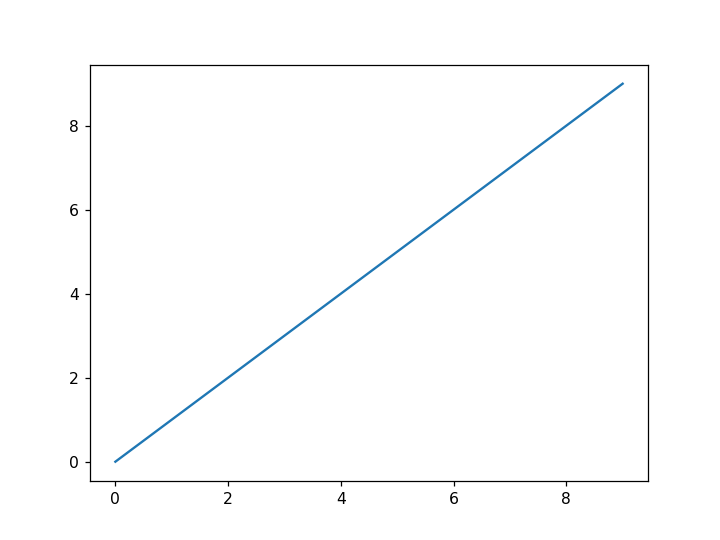

In [69]:
plt.plot(data)

## Figures And Subplots

<IPython.core.display.Javascript object>


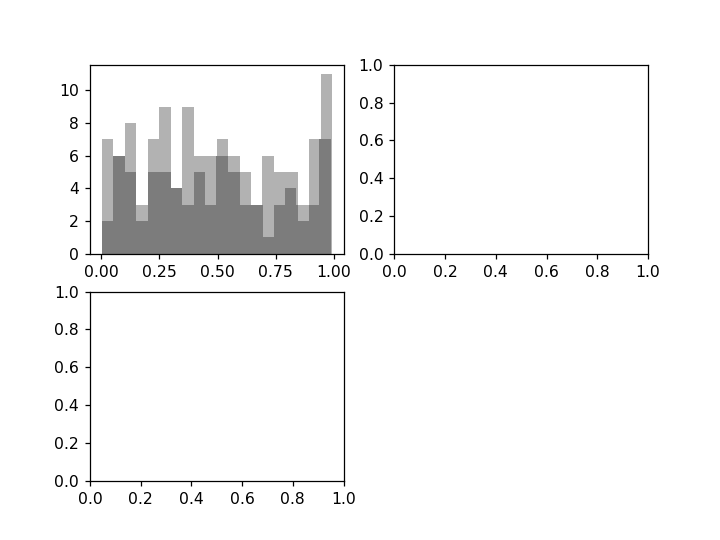

In [70]:
fig = plt.figure()

In [71]:
ax1 = fig.add_subplot(2,2,1)

In [82]:
ax2 = fig.add_subplot(2,2,2)


In [81]:
ax3 = fig.add_subplot(2,2,3)

In [84]:
_ = ax1.hist(np.random.rand(100),bins = 20, color = 'k', alpha = 0.3)

In [85]:
ax2 = scatter(np.arange(30), np.arange(30)+3 * np.random.randn(30))

NameError: name 'scatter' is not defined

<IPython.core.display.Javascript object>


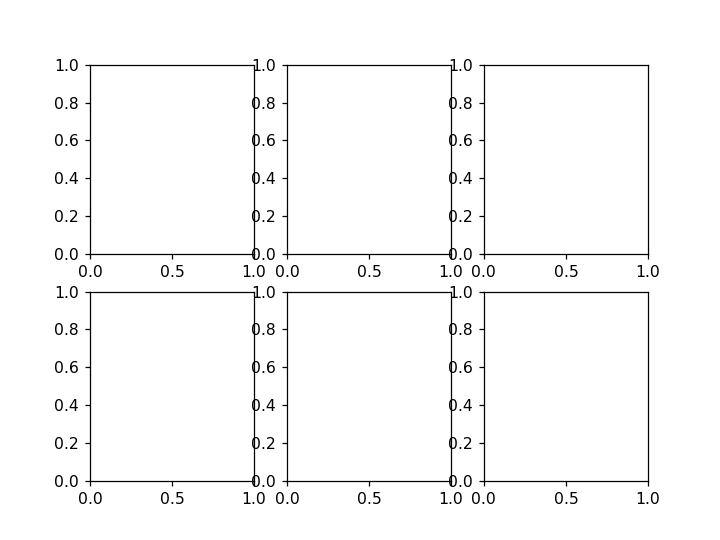

In [86]:
fig, axes = plt.subplots(2,3)

In [87]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [89]:
plt.subplots_adjust(left=None, bottom= None, right = None, top = None, wspace= None, hspace= None)

<IPython.core.display.Javascript object>


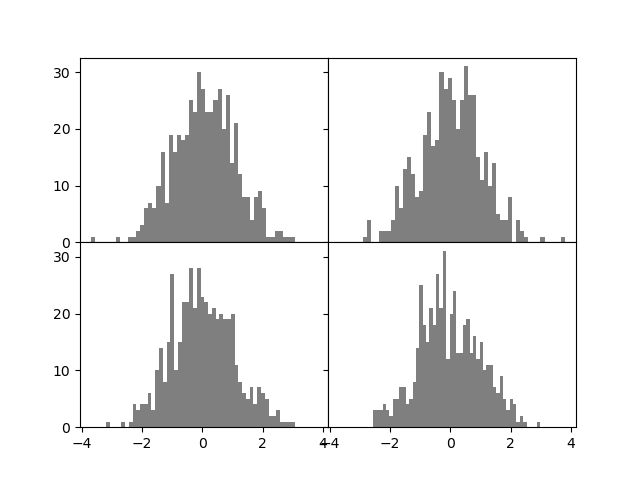

In [99]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [95]:
from numpy.random import randn

<IPython.core.display.Javascript object>


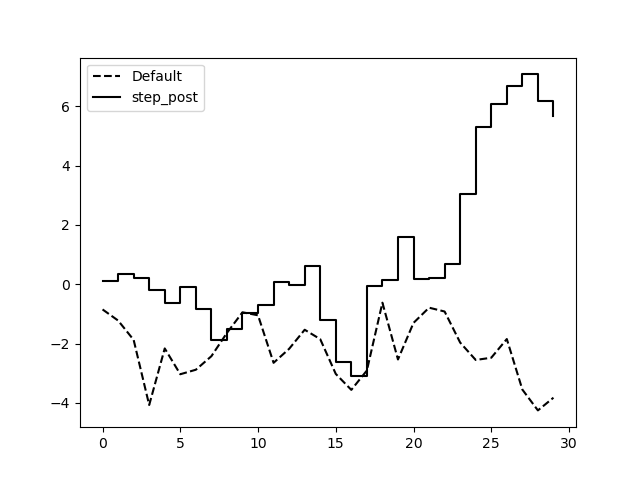

In [110]:
fig2 = plt.figure()

In [111]:
plt.plot(randn(30).cumsum(), 'k--', label= 'Default')
plt.plot(randn(30).cumsum(), 'k-', drawstyle = 'steps-post' , label= 'step_post')

In [114]:
?plt.legend

<IPython.core.display.Javascript object>


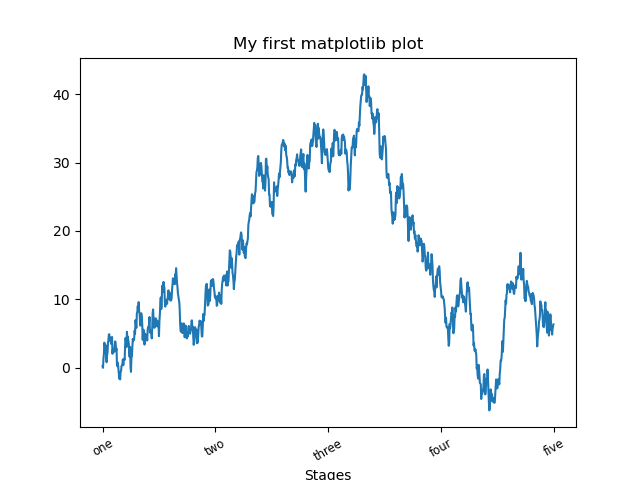

In [131]:
fig = plt.figure()

In [132]:
ax = fig.add_subplot(1,1,1)

In [133]:
ax.plot(np.random.randn(1000).cumsum())

In [134]:
ax.set_xticks([0,250,500,750,1000])

In [141]:
ax.set_xticklabels(['one','two','three', 'four', 'five'],
                           rotation = 30,
                           fontsize = 'small'
                          )

[Text(0, 0, 'one'),
 Text(250, 0, 'two'),
 Text(500, 0, 'three'),
 Text(750, 0, 'four'),
 Text(1000, 0, 'five')]

In [136]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [138]:
ax.set_xlabel('Stages')

Text(0.5, 10.888891973024519, 'Stages')

#### Adding Legend

<IPython.core.display.Javascript object>


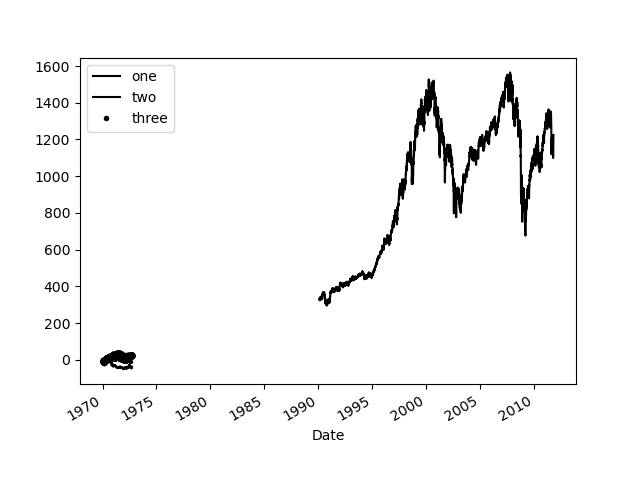

In [144]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)

In [145]:
ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'k-', label = 'two')
ax.plot(randn(1000).cumsum(), 'k.', label = 'three')

In [146]:
ax.legend(loc = 'best')

In [148]:
from datetime import datetime

<IPython.core.display.Javascript object>


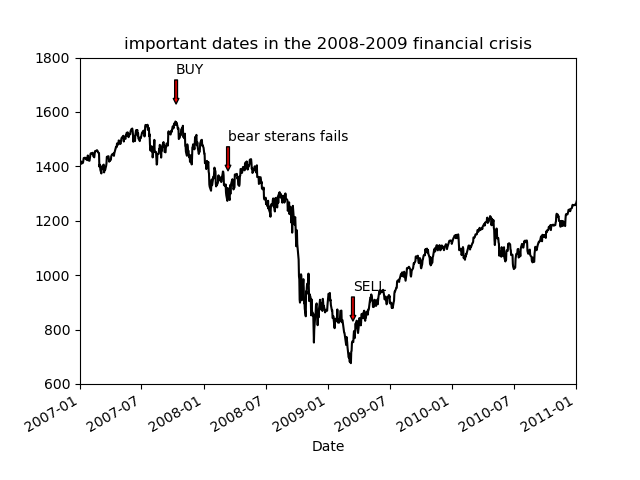

In [176]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [177]:
data = pd.read_csv(r'C:\Users\Sade\Documents\JupyterCalismalari\datasets\spx.csv', index_col = 0, parse_dates = True)

In [178]:
spx = data['SPX']

In [179]:
spx.plot(ax = ax , style ='k-')

<AxesSubplot:xlabel='Date'>

In [180]:
crisis_data = [(datetime(2007, 10, 11), 'BUY'),
              (datetime(2008,3,12), 'bear sterans fails'),
              (datetime(2009,3,15), 'SELL')]

In [181]:
for date, label in crisis_data:
    ax.annotate(label, xy= (date, spx.asof(date) + 75),
               xytext = (date, spx.asof(date) + 225),
                arrowprops = dict(facecolor='red', headwidth = 4 , width=2, headlength=4),
                horizontalalignment= 'left', verticalalignment ='top'
                
                
                
                
               )

In [182]:
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('important dates in the 2008-2009 financial crisis')

Text(0.5, 1.0, 'important dates in the 2008-2009 financial crisis')

In [192]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

<IPython.core.display.Javascript object>


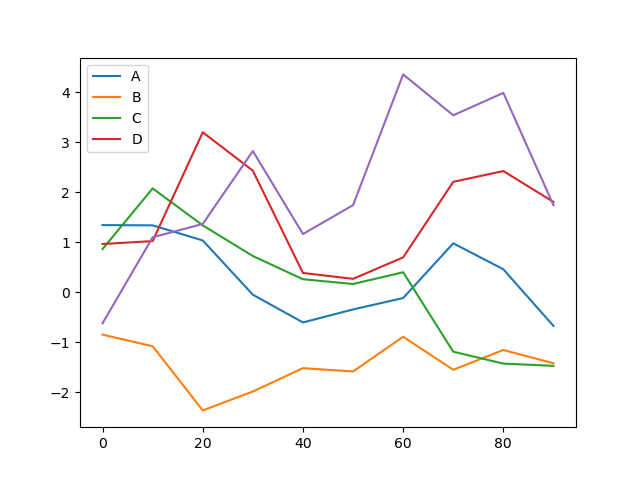

<AxesSubplot:>

In [190]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns = ['A', 'B', 'C', 'D'],
                 index = np.arange(0,100,10))
df.plot()

In [193]:
df

,A,B,C,D
0,1.346063,-0.845265,0.866564,0.967742
10,1.340822,-1.077425,2.080245,1.025737
20,1.038781,-2.361069,1.340965,3.202645
30,-0.046573,-1.982920,0.727183,2.434757
40,-0.601732,-1.515980,0.262925,0.388493
50,-0.341389,-1.582686,0.167569,0.270527
60,-0.113311,-0.887128,0.402558,0.700250
70,0.981446,-1.548100,-1.186990,2.211426
80,0.461684,-1.152867,-1.424746,2.427346
90,-0.671278,-1.418008,-1.469768,1.809064


#### Bar Plots

<IPython.core.display.Javascript object>


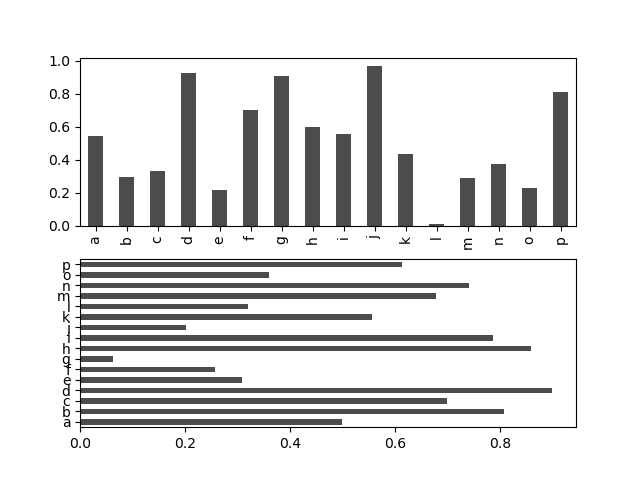

In [201]:
fig, axes = plt.subplots(2,1)

In [202]:
data = pd.Series( np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)

<AxesSubplot:>

In [203]:
data = pd.Series( np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot.barh(ax = axes[1], color = 'k', alpha = 0.7)

<AxesSubplot:>

In [207]:
df = pd.DataFrame(np.random.rand(6,4),
              index = ['one', 'two', 'three', 'four', 'five', 'six'],
              columns = pd.Index(['A','B','C','D'],
              name = 'Genus'))
df

Genus,A,B,C,D
one,0.936682,0.665107,0.615445,0.062264
two,0.601791,0.507442,0.972791,0.682801
three,0.648579,0.225867,0.724567,0.291807
four,0.565969,0.904961,0.435745,0.827074
five,0.645835,0.548469,0.396167,0.312893
six,0.060030,0.456879,0.090857,0.994632


<IPython.core.display.Javascript object>


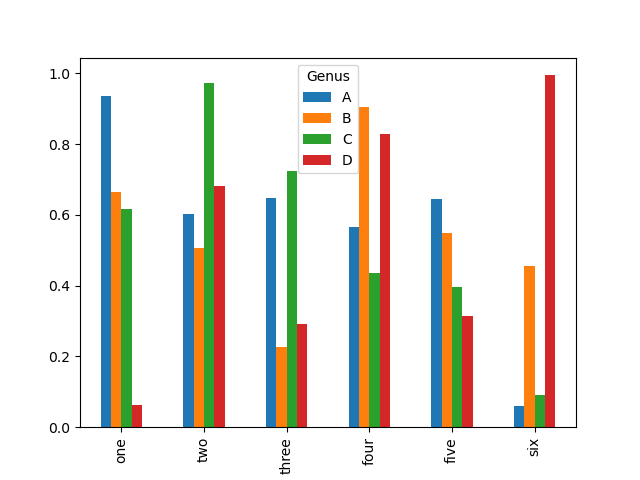

<AxesSubplot:>

In [208]:
df.plot.bar()

<IPython.core.display.Javascript object>


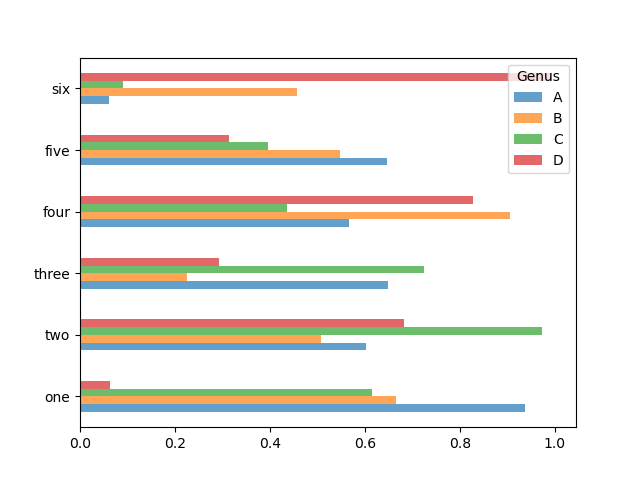

<AxesSubplot:>

In [212]:
df.plot.barh( alpha= 0.7)

In [5]:
tips = pd.read_csv(r'C:\Users\Sade\Documents\JupyterCalismalari\datasets\tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [6]:
party_counts = party_counts.loc[:,2:5]

In [7]:
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

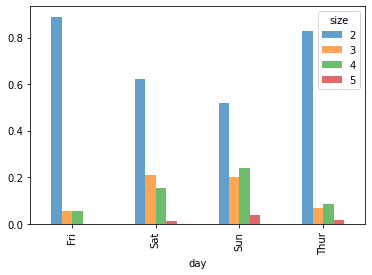

In [8]:
party_pcts.plot.bar(alpha = 0.7)

In [2]:
import seaborn as sns

In [9]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill']- tips['tip'])

In [10]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


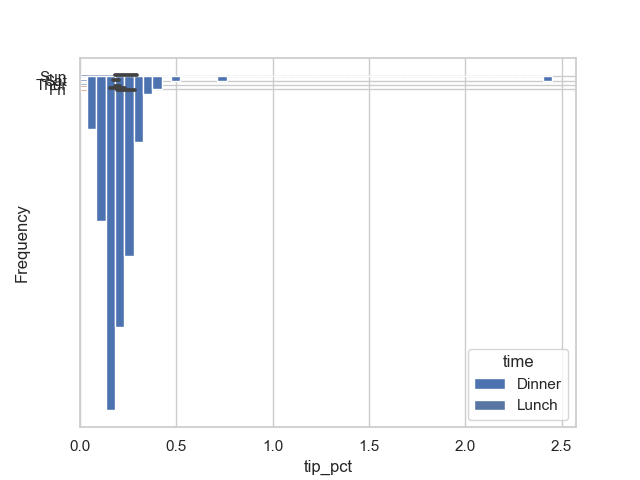

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [233]:

fig = plt.figure()
sns.barplot(x= 'tip_pct', y = 'day', data =tips, hue= 'time' ,orient = 'h')

In [232]:
sns.set(style = 'whitegrid')

<IPython.core.display.Javascript object>


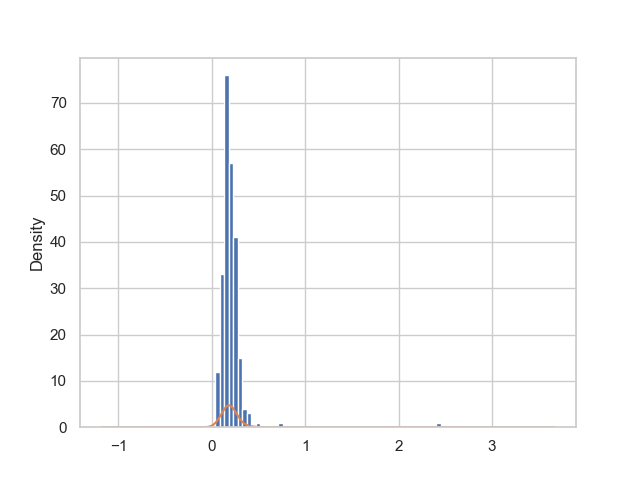

<AxesSubplot:ylabel='Frequency'>

In [235]:
fig = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


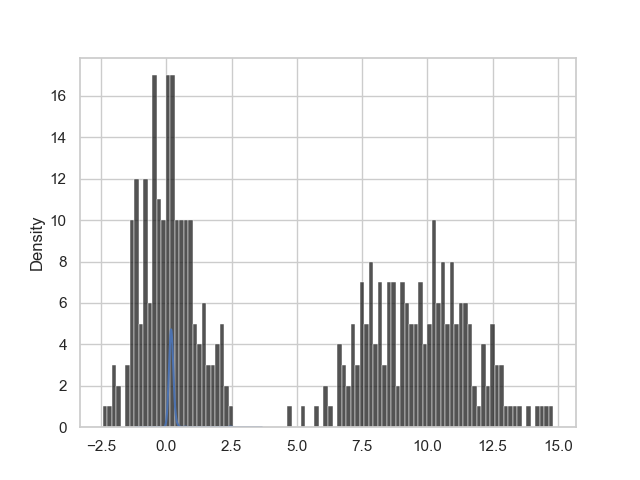

<AxesSubplot:ylabel='Density'>

In [247]:
fig = plt.figure()
tips['tip_pct'].plot.density()

<IPython.core.display.Javascript object>


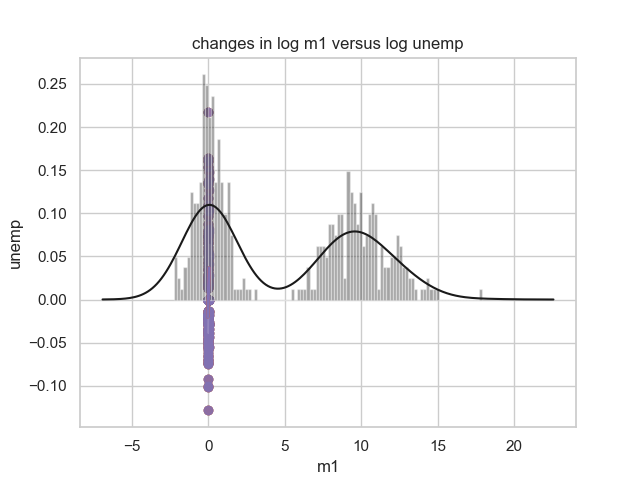

C:\Users\Sade\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [251]:
fig = plt.figure()
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins = 100, color = 'k')


### Scatter or Point Plots

In [252]:
macro = pd.read_csv(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\macrodata.csv")

In [253]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [255]:
trans_data = np.log(data).diff().dropna()

In [256]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


<IPython.core.display.Javascript object>


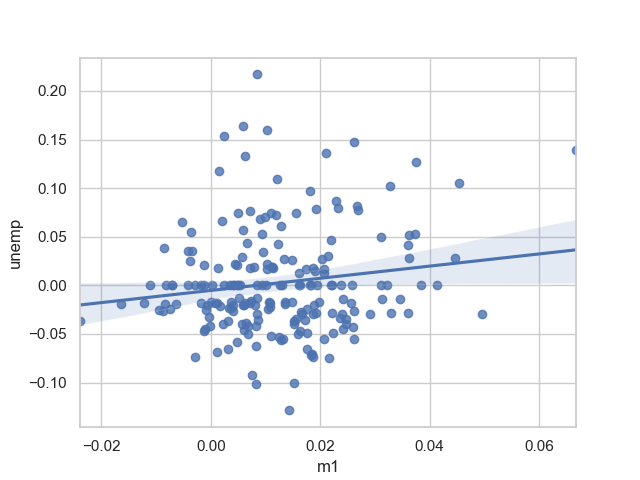

C:\Users\Sade\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='m1', ylabel='unemp'>

In [264]:
fig = plt.figure()
sns.regplot('m1', 'unemp', data =trans_data)


In [263]:
plt.title('changes in log %s versus log %s' %('m1', 'unemp'))

Text(0.5, 1.0, 'changes in log m1 versus log unemp')

<IPython.core.display.Javascript object>


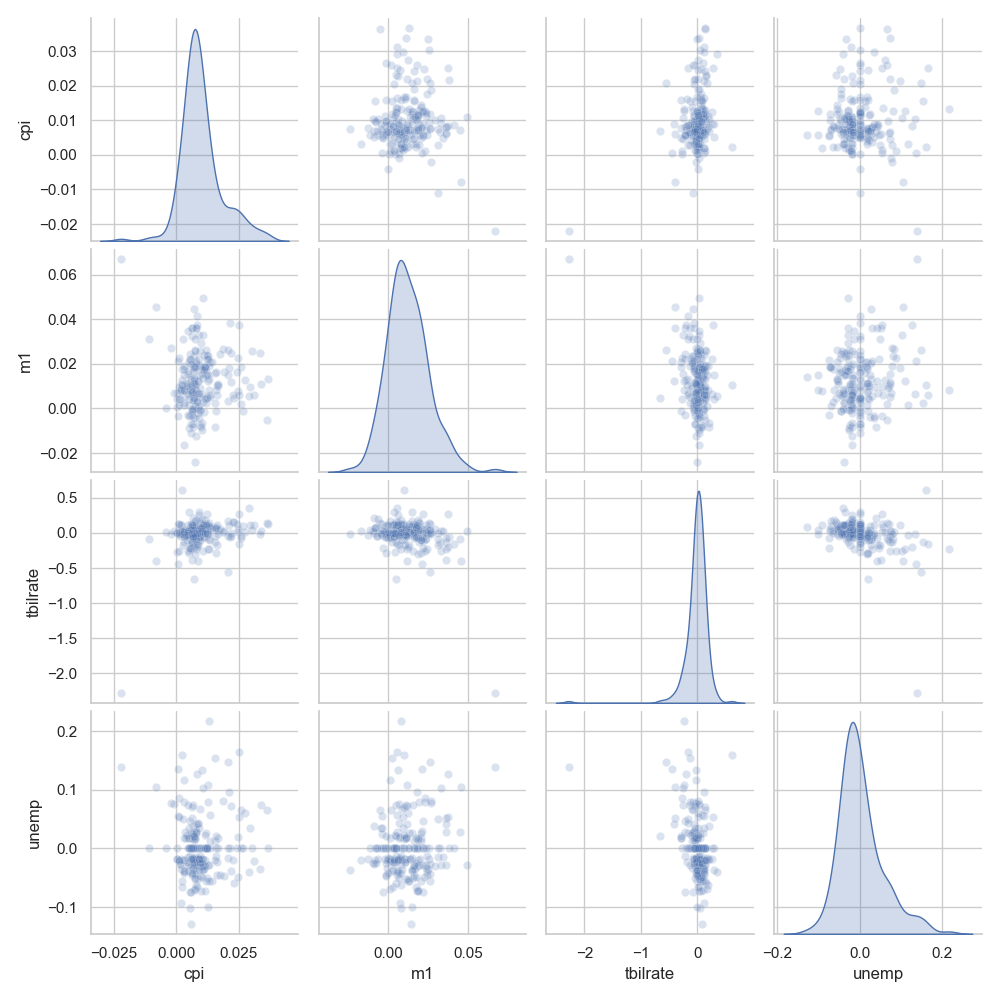

In [265]:
sns.pairplot(trans_data, diag_kind = 'kde', plot_kws  = {'alpha': 0.2})

### Facets Grids And Categorical Data

C:\Users\Sade\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


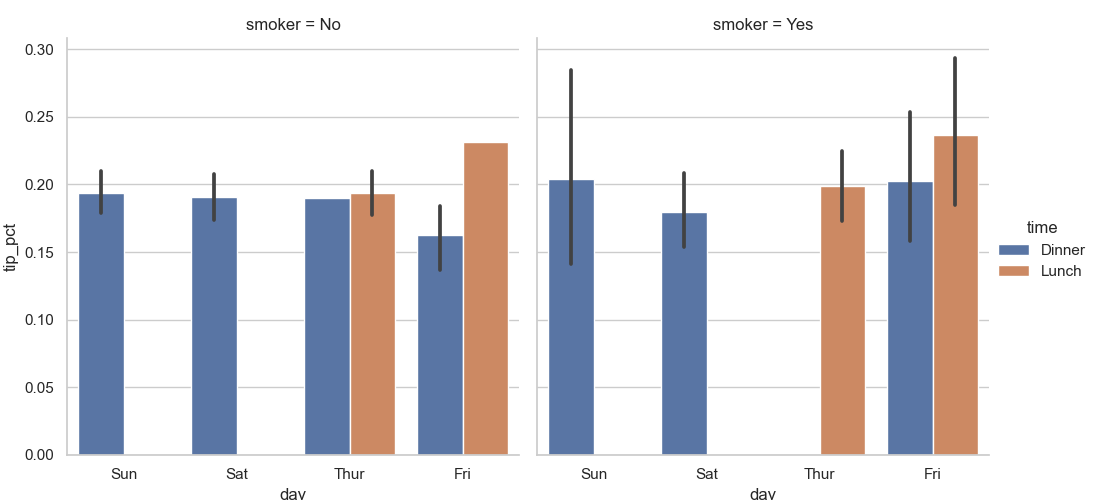

In [279]:
sns.factorplot(x= 'day', y= 'tip_pct', hue= 'time', col = 'smoker', kind= 'bar', data= tips[tips.tip_pct<1])

C:\Users\Sade\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


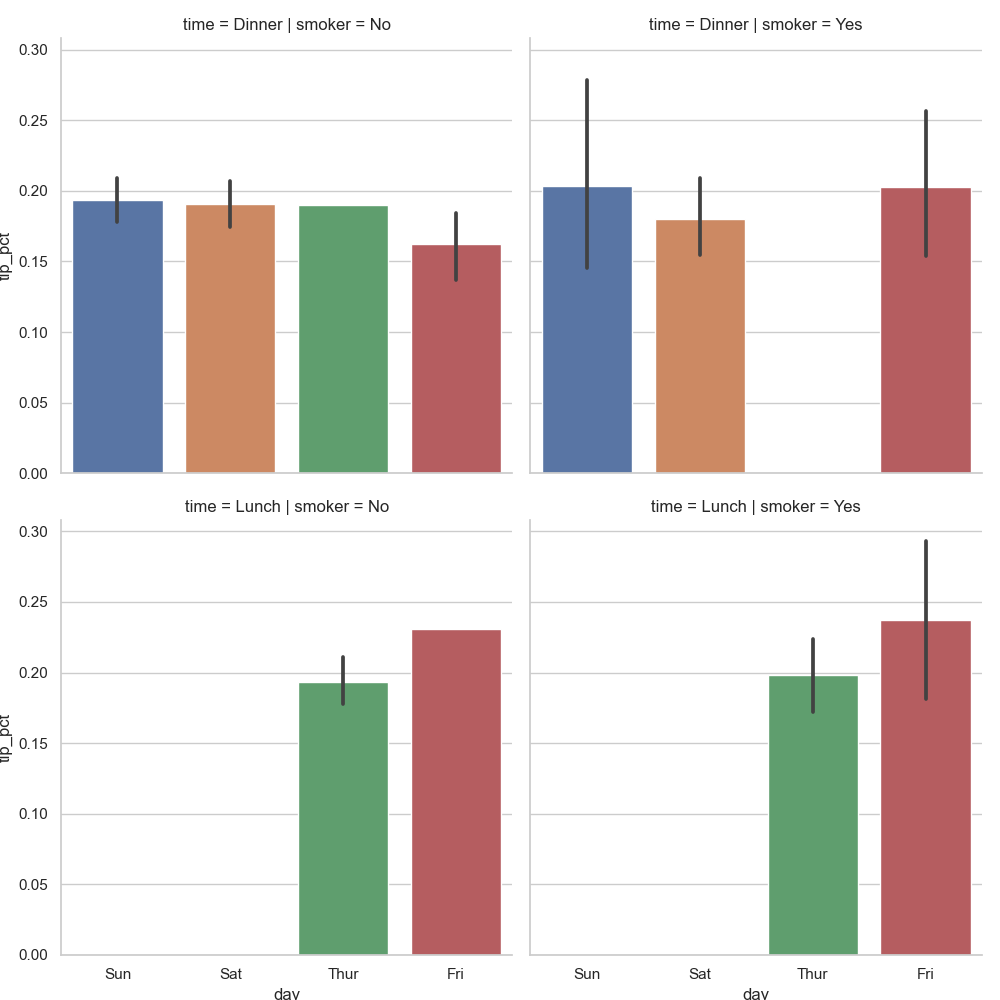

In [280]:
sns.catplot(x= 'day', y = 'tip_pct', row = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tip_pct<1])

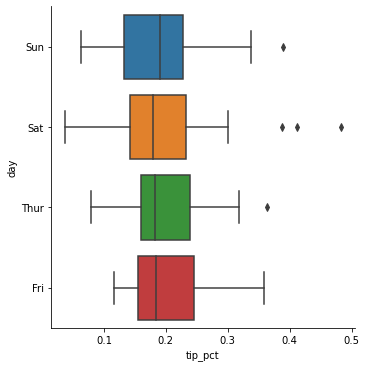

In [11]:
sns.catplot(x='tip_pct', y='day', kind = 'box', data = tips[tips.tip_pct< 0.5])

## Data Aggregation and Group Operations

In [12]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
 'key2' : ['one', 'two', 'one', 'two', 'one'],
 'data1' : np.random.randn(5),
 'data2' : np.random.randn(5)})

In [13]:
df

,key1,key2,data1,data2
0,a,one,-0.396784,-0.853832
1,a,two,0.211962,0.124028
2,b,one,-0.831274,0.029110
3,b,two,0.616307,-0.245186
4,a,one,0.381041,0.386990


In [14]:
grouped = df['data1'].groupby(df['key1'])

In [16]:
grouped.mean()

key1
a    0.065406
b   -0.107484
Name: data1, dtype: float64

In [19]:
## 2 Series (kolona göre gruplamak istersek)
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one    -0.007872
      two     0.211962
b     one    -0.831274
      two     0.616307
Name: data1, dtype: float64

In [22]:
means.unstack()

key2,one,two
key1,,
a,-0.007872,0.211962
b,-0.831274,0.616307


In [23]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [25]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [26]:
df['data1'].groupby([states,years]).mean() ## alakasız datalarla nasıl gruplama yaptık merak konusu.

California  2005    0.211962
            2006   -0.831274
Ohio        2005    0.109761
            2006    0.381041
Name: data1, dtype: float64

In [27]:
## groupby içerisinde iterasyon yapmamız mümkündür.

for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.396784 -0.853832
1    a  two  0.211962  0.124028
4    a  one  0.381041  0.386990
b
  key1 key2     data1     data2
2    b  one -0.831274  0.029110
3    b  two  0.616307 -0.245186


In [29]:
for name, group in df.groupby(['key1','key2']):
    print(name)
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.396784 -0.853832
4    a  one  0.381041  0.386990
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.211962  0.124028
('b', 'one')
  key1 key2     data1    data2
2    b  one -0.831274  0.02911
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.616307 -0.245186


In [30]:
## parçalara ayırma işlemi - parçalara ayrıldıktan sonra istenilen yapılabilir dataya.
pieces = dict(list(df.groupby('key1')))

In [31]:
pieces

{'a':   key1 key2     data1     data2
 0    a  one -0.396784 -0.853832
 1    a  two  0.211962  0.124028
 4    a  one  0.381041  0.386990,
 'b':   key1 key2     data1     data2
 2    b  one -0.831274  0.029110
 3    b  two  0.616307 -0.245186}

In [32]:
## groupby defaul olarak axis = 0 üzerinden gruplanır ancak kolonlar üzerinden gruplamak için axis = 1 kullanılabilir

In [33]:
grouped = df.groupby(df.dtypes, axis = 1) 

In [36]:
for dtype, group in grouped: ## dtypelar üzerinden kolon bazından bir gruplama yaptık.
    print(dtype)    ## ayrıca bu for döngüsü kullanım grouplanmış bir nesnesinin printi için kullanılır.
    print(group)

float64
      data1     data2
0 -0.396784 -0.853832
1  0.211962  0.124028
2 -0.831274  0.029110
3  0.616307 -0.245186
4  0.381041  0.386990
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Selecting a Column or Subset of Columns

In [46]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.233421
     two   0.124028
b    one   0.029110
     two  -0.245186

In [50]:
df['data1'].groupby(df['key1']).mean()


key1
a    0.065406
b   -0.107484
Name: data1, dtype: float64

In [51]:
df.groupby('key1')['data1'].mean() # yukarıdaki ile aynıdır.

key1
a    0.065406
b   -0.107484
Name: data1, dtype: float64

In [52]:
df[['data2']].groupby(df['key1']).mean()


,data2
key1,
a,-0.114271
b,-0.108038


In [54]:
df.groupby('key1')[['data2']].mean() ##bu yukarıdaki ile aynıdır.

,data2
key1,
a,-0.114271
b,-0.108038


### Grouping with Dict and Series

In [55]:
people = pd.DataFrame(np.random.randn(5, 5),
columns=['a', 'b', 'c', 'd', 'e'],
index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])


In [56]:
people.iloc[2:3, [1,2]] = np.nan

In [57]:
people

,a,b,c,d,e
Joe,-0.066497,-0.772904,0.821210,-1.120083,0.896281
Steve,-1.508450,-0.539139,0.643716,-0.140864,-0.904020
Wes,0.967274,NaN,NaN,-0.805783,1.199613
Jim,2.205317,0.102943,-1.229893,0.933760,-0.688482
Travis,-0.468472,-0.483262,0.197634,1.012154,-1.517707


In [58]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
 'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [63]:
by_column = people.groupby(mapping, axis = 1) ## mapping yazdığımız parametre olarak series de yazabiliriz.


In [65]:
by_column.sum()

,blue,red
Joe,-0.298873,0.056880
Steve,0.502852,-2.951609
Wes,-0.805783,2.166887
Jim,-0.296133,1.619778
Travis,1.209788,-2.469441


### Grouping with Functions

In [66]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
 [1, 3, 5, 1, 3]],
 names=['cty', 'tenor'])

In [67]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)

In [68]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.349762 -0.827028  0.269969  0.863741  1.002234
1      0.472218 -1.212977 -1.650424 -0.042432 -0.327437
2      0.091867 -0.374416  0.647878 -0.832746  0.760246
3      1.289640 -0.580155 -2.500320 -0.705623  0.585489

In [69]:
## hiyerarşik gruplamalarda parametrede hangi hiyerarşide olucağımızı belirtiriz.
hier_df.groupby(level='cty', axis = 1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


### Data Aggregation

In [70]:
df

,key1,key2,data1,data2
0,a,one,-0.396784,-0.853832
1,a,two,0.211962,0.124028
2,b,one,-0.831274,0.029110
3,b,two,0.616307,-0.245186
4,a,one,0.381041,0.386990


In [73]:
grouped = df.groupby('key1')

In [78]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.065406  0.409099 -0.396784 -0.092411  0.211962  0.296501   
b      2.0 -0.107484  1.023594 -0.831274 -0.469379 -0.107484  0.254412   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.381041   3.0 -0.114271  0.653835 -0.853832 -0.364902  0.124028   
b     0.616307   2.0 -0.108038  0.193957 -0.245186 -0.176612 -0.108038   

                         
           75%      max  
key1                     
a     0.255509  0.38699  
b    -0.039464  0.02911

In [74]:
grouped['data1'].quantile(0.9)

key1
a    0.347225
b    0.471549
Name: data1, dtype: float64

In [75]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak) ##kendi aggregation fonksiyonumuzu yazarız.


,data1,data2
key1,,
a,0.777825,1.240822
b,1.447581,0.274296


### Column-Wise and Multiple Function Application

In [79]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


In [80]:
grouped = tips.groupby(['day', 'smoker'])

In [83]:
grouped_pct = grouped['tip_pct']

In [91]:
grouped_pct.agg([('ortalama','mean'), 'std', peak_to_peak])

ortalama       std  <function peak_to_peak at 0x0000018699DDD280>
day  smoker                                                                   
Fri  No      0.179740  0.039458                                       0.094263
     Yes     0.216293  0.077530                                       0.242219
Sat  No      0.190412  0.058626                                       0.352192
     Yes     0.179833  0.089496                                       0.446137
Sun  No      0.193617  0.060302                                       0.274897
     Yes     0.322021  0.538061                                       2.382107
Thur No      0.193424  0.056065                                       0.284273
     Yes     0.198508  0.057170                                       0.219047

In [100]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]

grouped[['tip_pct', 'total_bill']].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.179740   0.001557    18.420000   25.596333
     Yes        0.216293   0.006011    16.813333   82.562438
Sat  No         0.190412   0.003437    19.661778   79.908965
     Yes        0.179833   0.008010    21.276667  101.387535
Sun  No         0.193617   0.003636    20.506667   66.099980
     Yes        0.322021   0.289509    24.120000  109.046044
Thur No         0.193424   0.003143    17.113111   59.625081
     Yes        0.198508   0.003268    19.190588   69.808518

In [94]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.136861  0.231125  0.179740  0.039458    9
     Yes     0.115518  0.357737  0.216293  0.077530   31
Sat  No      0.060217  0.412409  0.190412  0.058626  115
     Yes     0.036955  0.483092  0.179833  0.089496  104
Sun  No      0.063204  0.338101  0.193617  0.060302  167
     Yes     0.070274  2.452381  0.322021  0.538061   49
Thur No      0.078704  0.362976  0.193424  0.056065  112
     Yes     0.098918  0.317965  0.198508  0.057170   40

### 10.3 General split-apply-combine

In [ ]:
aa

In [102]:
def top(df, n=5, column= 'tip_pct'):
    return df.sort_values(by=column)[-n:]

In [ ]:
aa

In [103]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.387973
183,23.17,6.50,Yes,Sun,Dinner,4,0.389922
232,11.61,3.39,No,Sat,Dinner,2,0.412409
67,3.07,1.00,Yes,Sat,Dinner,1,0.483092
178,9.60,4.00,Yes,Sun,Dinner,2,0.714286
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381


In [ ]:
aa

In [104]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.310180
       185       20.69  5.00     No   Sun  Dinner     5  0.318674
       51        10.29  2.60     No   Sun  Dinner     2  0.338101
       149        7.51  2.00     No  Thur   Lunch     2  0.362976
       232       11.61  3.39     No   Sat  Dinner     2  0.412409
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.387973
       183       23.17  6.50    Yes   Sun  Dinner     4  0.389922
       67         3.07  1.00    Yes   Sat  Dinner     1  0.483092
       178        9.60  4.00    Yes   Sun  Dinner     2  0.714286
       172        7.25  5.15    Yes   Sun  Dinner     2  2.452381

In [105]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column= 'total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.166667
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.228833
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.115821
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.138160
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.133465
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.245038
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.083632
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.131199

In [106]:
tips.head(10)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
5,25.29,4.71,No,Sun,Dinner,4,0.228863
6,8.77,2.00,No,Sun,Dinner,2,0.295421
7,26.88,3.12,No,Sun,Dinner,4,0.131313
8,15.04,1.96,No,Sun,Dinner,2,0.149847
9,14.78,3.23,No,Sun,Dinner,2,0.279654


In [109]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.192237,0.057665,0.060217,0.158622,0.184308,0.227015,0.412409
Yes,93.0,0.218176,0.254295,0.036955,0.119534,0.181818,0.242326,2.452381


In [110]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.192237
       Yes         0.218176
std    No          0.057665
       Yes         0.254295
min    No          0.060217
       Yes         0.036955
25%    No          0.158622
       Yes         0.119534
50%    No          0.184308
       Yes         0.181818
75%    No          0.227015
       Yes         0.242326
max    No          0.412409
       Yes         2.452381
dtype: float64

### Supressing the Group Keys

In [113]:
tips.groupby('smoker', group_keys = False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.310180
185,20.69,5.00,No,Sun,Dinner,5,0.318674
51,10.29,2.60,No,Sun,Dinner,2,0.338101
149,7.51,2.00,No,Thur,Lunch,2,0.362976
232,11.61,3.39,No,Sat,Dinner,2,0.412409
109,14.31,4.00,Yes,Sat,Dinner,2,0.387973
183,23.17,6.50,Yes,Sun,Dinner,4,0.389922
67,3.07,1.00,Yes,Sat,Dinner,1,0.483092
178,9.60,4.00,Yes,Sun,Dinner,2,0.714286
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381


#### Quantile and Bucket Analysis

In [115]:
# pandas üzerinde cut qcut gibi fonksiyonlarla data frameimizi intervallara bölebiliriz. Bu böldüğümüz
# dataframei grouplarken direk parametre olarak da yollamak mümkündür.

frame = pd.DataFrame({'data1': np.random.randn(1000),
'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)


In [116]:
def get_stats(group):
    return {'min': group.min(), 'nax': group.max(), 'count': group.count(), 'mean': group.mean()}

In [117]:
grouped = frame.data2.groupby(quartiles)

In [119]:
grouped.apply(get_stats).unstack()

,min,nax,count,mean
data1,,,,
"(-3.152, -1.622]",-2.762172,2.410524,48.0,0.014829
"(-1.622, -0.098]",-3.047353,2.953873,428.0,-0.032254
"(-0.098, 1.426]",-3.297372,3.144815,446.0,-0.040200
"(1.426, 2.95]",-2.164732,2.181465,78.0,-0.069680


In [120]:
## equal_length bir gruplamak yaptık equal_size yapmak istersek de

In [121]:
grouping = pd.qcut(frame.data1, 10, labels= False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,nax,count,mean
data1,,,,
0,-2.762172,2.410524,100.0,0.003901
1,-2.549916,2.550923,100.0,-0.095402
2,-2.884856,2.756431,100.0,-0.079309
3,-3.047353,2.109088,100.0,0.087979
4,-2.836742,2.953873,100.0,-0.033290
5,-2.644913,2.762879,100.0,-0.162203
6,-2.241753,2.931102,100.0,0.123954
7,-2.063402,2.973380,100.0,-0.108501
8,-3.297372,3.144815,100.0,0.017140


### Filling Missing Values with Group-Specific Values

In [142]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Oregon', 'Nevada', 'California', 'Idaho']

In [143]:
data = pd.Series(np.random.randn(8),index = states )

In [144]:
data

Ohio          0.716024
New York     -0.604244
Vermont       1.467236
Florida      -1.255750
Oregon       -0.618288
Nevada       -0.425502
California   -0.569154
Idaho        -1.180475
dtype: float64

In [145]:
group_key = ['East']*4 + ['West']*4

In [146]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [148]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [149]:
data.groupby(group_key).mean()

East   -0.381323
West   -0.593721
dtype: float64

In [150]:
fill_mean = lambda x: x.fillna(x.mean())

In [152]:
data.groupby(group_key).apply(fill_mean) #fill edilecek değerleri ilgili gruplarına göre atayabiliriz.

Ohio          0.716024
New York     -0.604244
Vermont      -0.381323
Florida      -1.255750
Oregon       -0.618288
Nevada       -0.593721
California   -0.569154
Idaho        -0.593721
dtype: float64

In [153]:
## Önceden fill ediceğimiz değeri de belirlemek mümkündür.

In [154]:
fill_values = {'East': 0.5, 'West': -1}

In [157]:
fill_func = lambda g: g.fillna(fill_values[g.name]) ##Buradaki name attribute grouplara özeldir.
#İnternal olarak name dediğimizde hangi gruba ait olduğunu çağırmış oluruz.

In [ ]:
data.groupby(group_key).apply(fill_func)

### Random Samping And Permutation

In [ ]:
aa

### Example: Group Weightened Average and Correlation

In [158]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
 'b', 'b', 'b', 'b'],
 'data': np.random.randn(8),
 'weights': np.random.rand(8)})

In [159]:
df

,category,data,weights
0,a,0.032544,0.017588
1,a,-1.513634,0.389392
2,a,0.636057,0.792741
3,a,1.224974,0.332716
4,b,2.320877,0.609782
5,b,0.430782,0.469052
6,b,0.565709,0.011576
7,b,-0.728619,0.271272


In [161]:
grouped = df.groupby('category')

get_wavg = lambda g: np.average(g['data'], weights = g['weights'])

grouped.apply(get_wavg)

category
a    0.210757
b    1.047369
dtype: float64

In [162]:
close_px = pd.read_csv(r'C:\Users\Sade\Documents\JupyterCalismalari\datasets\stock_px_2.csv', parse_dates = True
                      , index_col = 0)

In [163]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [165]:
close_px.head(10)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [169]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [170]:
rets = close_px.pct_change().dropna()
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


### Group-Wise Linear Regression

In [171]:
import statsmodels.api as sm

### Pivot Tables and Cross-Tabulation

# Time Series

### 11.1 Date and Time Data Types And Tools

In [178]:
from datetime import datetime #main modullerden biri,
from datetime import timedelta

In [176]:
now = datetime.now()

In [177]:
now

datetime.datetime(2021, 11, 17, 19, 5, 46, 848552)

In [179]:
## timedelta 2 datetime objesi arasındaki farktır. timedelta diğer datetime objelerine eklenebilir,
## çıkartılabilir ve çarpılabilir.

In [180]:
start = datetime(2011,1,7)

In [181]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

##### Converting Between String and Datetime

In [187]:
## Datetimeları string olarak yazdırmak için str fonksiyonunu kullanmak yeterlidir. strftime ile 
## zaman formatlanabilir.

In [183]:
stamp = datetime(2011,1,3)

In [184]:
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [188]:
str(stamp)

'2011-01-03 00:00:00'

In [192]:
stamp.strftime('%Y-%m-%d') # strftime methodu ile year month day şeklinde formatladık.
# methodun içindeki belirteçleri değiştirilip format unique hale getirilebilir.

'2011-01-03'

In [196]:
# aynı şekilde strftime methodunun içindeki belirteçler değiştirilip stringleri date e çevirebiliri.
# bu işlem için strptime fonksiyonu kullanılır.

In [197]:
value = '2011-01-03'

In [199]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [207]:
from dateutil.parser import parse #her seferinde methodlara typeları girmemek için parser ile işlem
# yapabiliriz.

In [208]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [214]:
# aslına bakılırsa dateutil ile insan işi çoğu date tanımı parse edilebilir.
parse('Feb 03, 1997 10:45 PM') # yıl , ay , gün , saat, dakika

datetime.datetime(1997, 2, 3, 22, 45)

In [216]:
# gün ay yıl formatındaki kullanımlarda dayfirst=True parametresi set edilebilir.
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [220]:
# pandasta genellikle date arrayleri çalışılır. To_datetime methodu ile fakrlı çeşit tarih temsilleri
# kolayca parse edilebilir.

datestrs = ['2011-07-06 12:00:00', '2010-06-04 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2010-06-04 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [221]:
## ayrıca missing şeklindeki dateleri de handle edebilir.

idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2010-06-04 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

### 11.2 Time Series Basics

In [222]:
from datetime import datetime 

In [223]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
datetime(2011, 1, 7), datetime(2011, 1, 8),
datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [227]:
ts = pd.Series(np.random.randn(6), index = dates)
ts # Time seriesler timestampler tarafından indexlenmiş serieslerdir.

2011-01-02   -0.646843
2011-01-05   -0.967961
2011-01-07   -0.364103
2011-01-08    0.693707
2011-01-10    0.570611
2011-01-12    1.486905
dtype: float64

##### İndexing, Selection, Subsetting

In [229]:
# Aslında time seriesler de label üzerindeki select ve indexleme üzerinde diğer pandas.Seriesler gibi
# davranırlar.
stamp = ts.index[2]
ts[stamp]

-0.3641033987231207

In [231]:
# indexin içine de string yollayabiliriz. tabi date olarak dönüşebilir bir string olması gerekiyor.

ts['1/10/2011']

0.5706106806391267

In [233]:
longer_ts = pd.Series(np.random.randn(1000),
index=pd.date_range('1/1/2000', periods=1000)) ## uzun time serieslerde yıl ve veya yıl-ay aynı anda 
# gönderilebilir

In [235]:
longer_ts['2001'] # 2001 yılın sahip indexler

2001-01-01    0.547069
2001-01-02   -2.125251
2001-01-03    1.313056
2001-01-04   -1.115928
2001-01-05    0.817366
                ...   
2001-12-27    0.264149
2001-12-28   -1.800178
2001-12-29    0.594156
2001-12-30   -1.266370
2001-12-31    0.457676
Freq: D, Length: 365, dtype: float64

In [236]:
longer_ts['2001-05'] # 2001 mayısa ait indexler

2001-05-01    2.237109
2001-05-02    1.641436
2001-05-03   -0.519252
2001-05-04    0.839930
2001-05-05    0.048736
2001-05-06   -0.325471
2001-05-07    1.017129
2001-05-08    1.021492
2001-05-09    0.117826
2001-05-10   -0.376050
2001-05-11   -0.959994
2001-05-12   -0.097900
2001-05-13    0.606813
2001-05-14   -1.961525
2001-05-15   -0.072250
2001-05-16   -1.416008
2001-05-17    1.842195
2001-05-18   -1.967453
2001-05-19   -2.316198
2001-05-20    1.400859
2001-05-21    1.135212
2001-05-22   -0.062990
2001-05-23    1.253702
2001-05-24   -0.554904
2001-05-25   -0.926822
2001-05-26   -0.010442
2001-05-27   -0.297034
2001-05-28    0.102730
2001-05-29    0.478618
2001-05-30    1.187799
2001-05-31    0.620871
Freq: D, dtype: float64

In [239]:
ts[datetime(2011,1,6):] # Slicing operasyonlar da mümkündürve time seriesler kronolojik(genellikle)
# sıralandıkları için time seriesin içinde olmayan bir timestamp de yollanabilir.

2011-01-07   -0.364103
2011-01-08    0.693707
2011-01-10    0.570611
2011-01-12    1.486905
dtype: float64

In [240]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.364103
2011-01-08    0.693707
2011-01-10    0.570611
dtype: float64

##### Time Series With Duplicate İndices

In [242]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000','1/2/2000', '1/3/2000'])

# bazı time serieslerde bir timestampe birden fazla gözlem yapılmış olabilir.

In [243]:
dup_ts = pd.Series(np.arange(5), index=dates)


In [244]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [247]:
dup_ts.index.is_unique # indexler uniquemü diye kontrol yapılır.

False

In [250]:
# duplike kayıtların bulunup uçurulması yararlı olacaktır. 
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [256]:
# non-nuqie imestamplerin üzerinde aggregate işlemleri yapmak için 
#bir yol groupby ve pass level= 0 dır.
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [258]:
grouped.count() # duplike kayıtları saptamak için bir yol.

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### 11.3 Date Ranges, Frequencies and Shifting

In [263]:
# Dataları bazen fixed frequency yapmak isyebiliriz bu missing value doğursa dahi.
ts

2011-01-02   -0.646843
2011-01-05   -0.967961
2011-01-07   -0.364103
2011-01-08    0.693707
2011-01-10    0.570611
2011-01-12    1.486905
dtype: float64

In [264]:
resampler = ts.resample('D') # resample ile daily frequencye çevirebiliriz.

In [262]:
resampler

###### Generating Date Ranges

In [266]:
# pandas.data_range ile belirlenen uzunluk ve frekansta DatetimeIndex üretmek 
# mümkündür.
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [267]:
# date_range Default olarak daily frekansta üretir ancak period=20 gibi
# parametrelerle belirlemek mümkündür bu aralığı.

In [270]:
# date_range time kısmını korur ama normalize ederek saat dakika kımsını 
# gece yarısına endeksleyebiliriz.
pd.date_range('2012-05-02 12:56:31', periods = 5 , normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

##### Frequencies and Date Offsets

In [271]:
# Pandas içerisindeki her frequency tipik bir string değeriyle ifade edilir.
# 'H' ve 'M' bunlara örnektir. Aynı zamanda bu frequencyleri ima eden dateoffset
# objeleri de vardır. Saat frequencysinin saat classı tarafından temsil edilmesi gibi.
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [274]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [275]:
# Şimdi bu kurduğumuz offsetleri dataların frequencysi atanırken kullanabiliriz.
# aslında çoğu uygulamada bu tarz bir obje yaratılmaz onun yerine direkt olarak
# freq methodunu kullanmak da pratik bir yöntem olacaktır.
pd.date_range('2001-01-01','2001-01-03 23:59', freq = '4H')

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 04:00:00',
               '2001-01-01 08:00:00', '2001-01-01 12:00:00',
               '2001-01-01 16:00:00', '2001-01-01 20:00:00',
               '2001-01-02 00:00:00', '2001-01-02 04:00:00',
               '2001-01-02 08:00:00', '2001-01-02 12:00:00',
               '2001-01-02 16:00:00', '2001-01-02 20:00:00',
               '2001-01-03 00:00:00', '2001-01-03 04:00:00',
               '2001-01-03 08:00:00', '2001-01-03 12:00:00',
               '2001-01-03 16:00:00', '2001-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [279]:
# freq parametresinde freqler birbirleriyle kombine edilebilirler.
pd.date_range('2000-03-01', periods =20 , freq = '1h30min')

DatetimeIndex(['2000-03-01 00:00:00', '2000-03-01 01:30:00',
               '2000-03-01 03:00:00', '2000-03-01 04:30:00',
               '2000-03-01 06:00:00', '2000-03-01 07:30:00',
               '2000-03-01 09:00:00', '2000-03-01 10:30:00',
               '2000-03-01 12:00:00', '2000-03-01 13:30:00',
               '2000-03-01 15:00:00', '2000-03-01 16:30:00',
               '2000-03-01 18:00:00', '2000-03-01 19:30:00',
               '2000-03-01 21:00:00', '2000-03-01 22:30:00',
               '2000-03-02 00:00:00', '2000-03-02 01:30:00',
               '2000-03-02 03:00:00', '2000-03-02 04:30:00'],
              dtype='datetime64[ns]', freq='90T')

##### Week of month Dates

In [281]:
# ayın 3. cuması dediğimizde kolaylıkla bulabileceğimiz freq methodu 'WOM-3FRI'
# bu kullanımda wom week of month'a denk gelmektedir.
pd.date_range('2012-01-01', '2012-09-01', freq = 'WOM-3FRI')

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

#### Shifting(Leading and Lagging) Data

In [282]:
# Shifting datayı zamanda ileri ya da geri götürmektir. indexi sabit kalırken 
# datamız hareket eder. 
ts = pd.Series(np.random.rand(4), index=pd.date_range('2000-01-01', periods = 4 , freq= 'M'))

In [283]:
ts

2000-01-31    0.595331
2000-02-29    0.871148
2000-03-31    0.676957
2000-04-30    0.845220
Freq: M, dtype: float64

In [284]:
ts.shift(2) #dataları zamanda iki ileri götürücez.

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.595331
2000-04-30    0.871148
Freq: M, dtype: float64

In [285]:
# Shiftingin genel kullanımı belirli bir zaman içerisindeki yüzdelik değişimdir
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    0.463300
2000-03-31   -0.222914
2000-04-30    0.248558
Freq: M, dtype: float64

In [286]:
# eğer frekansı biliniyorsa indexler üzerinde shifting yapmak da mümkündür.
ts.shift(2, freq = 'M')

2000-03-31    0.595331
2000-04-30    0.871148
2000-05-31    0.676957
2000-06-30    0.845220
Freq: M, dtype: float64

##### Shifting Dates with offsets

In [289]:
from pandas.tseries.offsets import Day, MonthEnd #offsetlerin importu

In [290]:
now = datetime(2011,11,17)

In [291]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [292]:
# anchored offsetlerde(eşit aralıklı ayrılmayan) dateleri ile ya da geri sarmak rollforward ve rollback
# methodlarıyla mümkündür.
offset = MonthEnd()

offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [294]:
# Yaratıcı bir kullanım olarak anchoredleri gruoup by ile kullabiliriz. nasıl mı?
ts = pd.Series(np.random.randn(20),
              index = pd.date_range('2000-1-15', periods = 20 , freq = '4d'))

In [295]:
ts

2000-01-15    0.424334
2000-01-19   -0.906541
2000-01-23    0.900842
2000-01-27   -0.068001
2000-01-31    0.330991
2000-02-04   -0.510851
2000-02-08    1.597314
2000-02-12    0.405228
2000-02-16    0.040129
2000-02-20    1.198630
2000-02-24    0.778718
2000-02-28   -1.207937
2000-03-03    0.483943
2000-03-07    2.004574
2000-03-11   -1.249643
2000-03-15    0.854668
2000-03-19    1.165257
2000-03-23   -0.843053
2000-03-27    0.038532
2000-03-31    1.383310
Freq: 4D, dtype: float64

In [296]:
ts.groupby(offset.rollforward).mean() # dataları ayın son iş gününe göre grupladık.
# ve ortalamasını aldık.




2000-01-31    0.136325
2000-02-29    0.328747
2000-03-31    0.479699
dtype: float64

In [304]:
offset.rollforward(ts.index[0])

Timestamp('2000-01-31 00:00:00', freq='4D')

### 11.4 Time Zone Handling

In [305]:
import pytz # python timezoneların importu

In [306]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [308]:
tz = pytz.timezone('America/New_York')

In [309]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [310]:
rng = pd.date_range('2012-09-03 9:30', periods = 6, freq = 'D')

In [312]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2012-09-03 09:30:00   -0.633621
2012-09-04 09:30:00   -0.028488
2012-09-05 09:30:00    0.043185
2012-09-06 09:30:00    0.497491
2012-09-07 09:30:00   -0.959398
2012-09-08 09:30:00   -0.444595
Freq: D, dtype: float64

In [313]:
print(ts.index.tz) # indexin bir timezonu u yok

None


In [315]:
# date range ayarlanırken timezoneu da belirtebiliriz.
pd.date_range('2012-09-03 9:30', periods = 10 , freq = 'D', tz = 'UTC')

DatetimeIndex(['2012-09-03 09:30:00+00:00', '2012-09-04 09:30:00+00:00',
               '2012-09-05 09:30:00+00:00', '2012-09-06 09:30:00+00:00',
               '2012-09-07 09:30:00+00:00', '2012-09-08 09:30:00+00:00',
               '2012-09-09 09:30:00+00:00', '2012-09-10 09:30:00+00:00',
               '2012-09-11 09:30:00+00:00', '2012-09-12 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [317]:
# naive timezonedan tz_localize methodu ile tz değişimi sağlanabilir.
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-09-03 09:30:00+00:00   -0.633621
2012-09-04 09:30:00+00:00   -0.028488
2012-09-05 09:30:00+00:00    0.043185
2012-09-06 09:30:00+00:00    0.497491
2012-09-07 09:30:00+00:00   -0.959398
2012-09-08 09:30:00+00:00   -0.444595
Freq: D, dtype: float64

In [319]:
#bir kere localize edildikten sonra timezoneu değiştirmek için tz_conver methodu
# kullanmamız gerekicektir.
ts_utc.tz_convert('America/New_York')

2012-09-03 05:30:00-04:00   -0.633621
2012-09-04 05:30:00-04:00   -0.028488
2012-09-05 05:30:00-04:00    0.043185
2012-09-06 05:30:00-04:00    0.497491
2012-09-07 05:30:00-04:00   -0.959398
2012-09-08 05:30:00-04:00   -0.444595
Freq: D, dtype: float64

#### Operations with Time Zone - Aware Timestamp Objects

In [321]:
stamp = pd .Timestamp('2011-12-03 04:00')
stamp_utc = stamp.tz_localize('utc') #time zoneu localize ettik 
stamp_utc.tz_convert('America/New_York') # şimdi de conver ediyoruz

Timestamp('2011-12-02 23:00:00-0500', tz='America/New_York')

In [323]:
# bir timestamp create ederken içerisine timezoneu girebiliriz.
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')

In [324]:
from pandas.tseries.offsets import Hour

### 11.5 Periods and Period Arithmetic

In [326]:
## periodlar günler, aylar, çeyrekler ve yılları temsil eder.
p = pd.Period(2007, freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [327]:
# aritmetik işlemlere izin verilir.
p + 5

Period('2012', 'A-DEC')

In [328]:
p - 2

Period('2005', 'A-DEC')

In [329]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq = 'M') # periodlar
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [330]:
pd.Series(np.random.randn(6), index = rng ) # periodlar index olarak kullanılabilir

2000-01    1.705108
2000-02   -1.343718
2000-03   -0.977658
2000-04    0.800448
2000-05    0.799211
2000-06    0.811816
Freq: M, dtype: float64

##### Period Frequency Conversion

In [332]:
# Periodlar ve PeriodIndexler asfreq methoduyla değiştirelebilir.
p = pd.Period('2007', freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [334]:
p.asfreq( 'M', how = 'start')
p.asfreq('M', how = 'end')

Period('2007-12', 'M')

In [336]:
p = pd.Period('2007', freq = 'A-JUN') # period creati
p

Period('2007', 'A-JUN')

In [337]:
p.asfreq('M', 'start') # şu anki june u başlangıç aldı

Period('2006-07', 'M')

In [338]:
p.asfreq('M', 'end') # bir sonraki june u bitiş aldı.

Period('2007-06', 'M')

In [339]:
# frekanslar arası geçişe bir örnek verelim.
rng = pd.period_range('2006','2008', freq = 'A-DEC')
ts = pd.Series(np.random.randn(len(rng)),index = rng)

In [340]:
ts

2006    0.460271
2007    0.632189
2008   -0.066906
Freq: A-DEC, dtype: float64

In [341]:
ts.asfreq('M', how = 'start') # start üzerinden high frekansa geçiyoruz

2006-01    0.460271
2007-01    0.632189
2008-01   -0.066906
Freq: M, dtype: float64

In [342]:
ts.asfreq('B', how= 'end') # end üzerinden high frekansa geçiyoruz

2006-12-29    0.460271
2007-12-31    0.632189
2008-12-31   -0.066906
Freq: B, dtype: float64

#### Quterly Period Frequencies

In [343]:
# Çeyrekler üzerinde istediğimiz aya göre başlatılabilir.
p = pd.Period('2012Q4' , freq= 'Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [344]:
# Q-JAN ın kapsadığı aralık
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [346]:
# periodlar üzerinde aritmetik yapmak da mümkündür. 
# sondan 2. iş günü 4pm üzerine bir period
p4pm = (p.asfreq('B', 'e')-1).asfreq('T', 's') +16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [347]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

#### Converting Timestamps to Periods(and Back)

In [355]:
# to_period methodu ile timestampler perioda dönebilir
rng = pd.date_range('2000-01-01', periods = 3, freq = 'M')
ts = pd.Series( np.random.randn(len(rng)), index = rng)
ts

2000-01-31    0.632758
2000-02-29   -0.353665
2000-03-31   -0.590604
Freq: M, dtype: float64

In [356]:
pts = ts.to_period()

In [357]:
pts

2000-01    0.632758
2000-02   -0.353665
2000-03   -0.590604
Freq: M, dtype: float64

#### Creating a PeriodIndex from Array

In [359]:
data = pd.read_csv(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\macrodata.csv")

In [360]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [361]:
## datayı preiod halinde indexlemek için
index = pd.PeriodIndex(year=data.year , quarter=data.quarter, freq= 'Q-DEC')

In [363]:
data.index= index

## 11.6 Resampling and Frequency Conversion

In [ ]:
# higher to lower freq --> downsampling
# lower to higher req --> upsampling

In [364]:
# resample group by gibi çalışır önce resample çağrılır daha sonra aggrege 
# fonksiyon çağrılır.
rng = pd.date_range('2000-01-01', periods = 100, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2000-01-01    0.514730
2000-01-02    0.204439
2000-01-03   -0.223032
2000-01-04   -0.208241
2000-01-05    0.313114
                ...   
2000-04-05   -0.143370
2000-04-06   -1.954064
2000-04-07   -0.016736
2000-04-08   -0.666915
2000-04-09    0.531272
Freq: D, Length: 100, dtype: float64

In [365]:
ts.resample('M').mean() # resample ile aylar içerisindeki dataları ayın son 
# gününe göre groupladık

2000-01-31    0.089410
2000-02-29    0.165264
2000-03-31    0.057629
2000-04-30   -0.273894
Freq: M, dtype: float64

In [369]:
ts.resample('M', kind = 'period').mean() # period halinde resample örneği

2000-01    0.089410
2000-02    0.165264
2000-03    0.057629
2000-04   -0.273894
Freq: M, dtype: float64

#### Downsampling

In [371]:
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T' ) 
ts = pd.Series(np.arange(12), index = rng)

In [386]:
ts

2000-01-01 00:00:00     2.0
2000-01-01 00:05:00     7.0
2000-01-01 00:10:00    10.5
Freq: 5T, dtype: float64

In [375]:
ts.resample('5min', closed = 'right').sum() # 5 dakikaya bölerek resample 
# ediyoruz. ve sağdan kapalı aralık.

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [377]:
ts.resample('5min', closed = 'right', label = 'right').sum() # label parametresi
# sayesinde indexlerin nasıl görüneceğini ayarlarız.

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [379]:
# bu kafa karışıklığına son vermek için 1 saniye intervallerden çıkartabiliriz.
# böylece aralıklar daha kesin anlaşılabilir bir hal alır.
ts.resample('5min', closed = 'right', label = 'right', loffset= '-1s').sum()

<ipython-input-379-371bdeac35ce>:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed = 'right', label = 'right', loffset= '-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [384]:
from pandas.tseries.frequencies import to_offset
ts = ts.resample('5min').sum()
ts.index = ts.index.to_timestamp() + to_offset('-1s')

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

#### Open-High-Low-Close (OHLC) resampling

In [385]:
# ilk, son, max, min değerlerin dizilmesi işlemidir. Dizi resample edildikten
# sonra ohlc() methodu ile istenilen gözlemler listelenebilir.

ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,2.0,2.0,2.0,2.0
2000-01-01 00:05:00,7.0,7.0,7.0,7.0
2000-01-01 00:10:00,10.5,10.5,10.5,10.5


### Upsampling and Interpolation

In [398]:
# lower to higher yaptığımız zaman bir aggrege işlemine gerek olmaksızın bunu 
# yapabiliriz.
frame = pd.DataFrame(np.random.rand(2,4),
                    index = pd.date_range('2000-01-01', periods = 2, freq = 'W-WED'),
                    columns =['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.578487,0.308516,0.825666,0.543753
2000-01-12,0.288704,0.114680,0.069213,0.974473


In [397]:
df_daily = frame.resample('D').asfreq() ## günlük frekansta resample ettik
df_daily # gruplamada aggregeye gerek yoktu asfreq ile yazdırdık diye düşünüyorum.?

,Colorado,Texas,New York,Ohio
2000-01-05,0.596058,0.821293,0.110769,0.629889
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.353774,0.521025,0.502902,0.621312


In [401]:
frame.resample('D').ffill(limit = 2 ) ## fillna ve reindex methodları resample üzerinde de 
# geçerlidir. limit 2 burada opsiyoneldir.

,Colorado,Texas,New York,Ohio
2000-01-05,0.578487,0.308516,0.825666,0.543753
2000-01-06,0.578487,0.308516,0.825666,0.543753
2000-01-07,0.578487,0.308516,0.825666,0.543753
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.288704,0.114680,0.069213,0.974473


### Resampling with Periods

In [403]:
# data frame oluşturalım ve indexi period olsun.
frame = pd.DataFrame(np.random.randn(24, 4),
index=pd.period_range('1-2000', '12-2001',
freq='M'),
columns=['Colorado', 'Texas', 'New York', 'Ohio'])


In [404]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.509644,0.720210,0.720817,-0.711030
2000-02,1.517235,0.847278,0.806203,-1.068224
2000-03,0.094222,0.918365,-0.611197,-0.502321
2000-04,0.131627,0.597017,1.136826,-0.844997
2000-05,-0.439300,-0.091179,2.076745,0.482133


In [405]:
annual_frame = frame.resample('A-DEC').mean() # annuel aralık şeklinde resample
# edip mean aldık. ve downsampling yaptık.
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.050546,0.055497,0.109999,-0.431862
2001,-0.012758,-0.210105,-0.320810,-0.163159


In [406]:
annual_frame.resample('Q-DEC').ffill() ## upsampling biraz daha meşakatlidir.
# çünkü frekansı arttırdığımızda yeni frekansın sonunu seçmmemiz gerekicek.
# aynı asfreq methodunda olduğu gibi. Bunun için convention argümanı kullanılır.

,Colorado,Texas,New York,Ohio
2000Q1,0.050546,0.055497,0.109999,-0.431862
2000Q2,0.050546,0.055497,0.109999,-0.431862
2000Q3,0.050546,0.055497,0.109999,-0.431862
2000Q4,0.050546,0.055497,0.109999,-0.431862
2001Q1,-0.012758,-0.210105,-0.320810,-0.163159
2001Q2,-0.012758,-0.210105,-0.320810,-0.163159
2001Q3,-0.012758,-0.210105,-0.320810,-0.163159
2001Q4,-0.012758,-0.210105,-0.320810,-0.163159


In [408]:
annual_frame.resample('Q-DEC', convention = 'end').ffill() # convention 
# belirtilen frekansın sonunu ya da ilkini dahil etmek için kullanılır (?)

,Colorado,Texas,New York,Ohio
2000Q4,0.050546,0.055497,0.109999,-0.431862
2001Q1,0.050546,0.055497,0.109999,-0.431862
2001Q2,0.050546,0.055497,0.109999,-0.431862
2001Q3,0.050546,0.055497,0.109999,-0.431862
2001Q4,-0.012758,-0.210105,-0.320810,-0.163159


### 11.7 Moving Window Functions 

In [409]:
close_px_all = pd.read_csv(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\stock_px_2.csv", parse_dates = True, index_col = 0)

In [432]:
close_px_all[:5] ## expanding ve rolling methodlarını kullnarak hareketli ortalama
# grafikleri hesaplıyacağız.

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [411]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [413]:
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

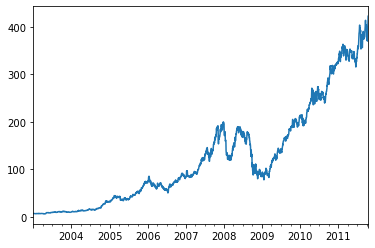

In [418]:
close_px.AAPL.plot()

<AxesSubplot:>

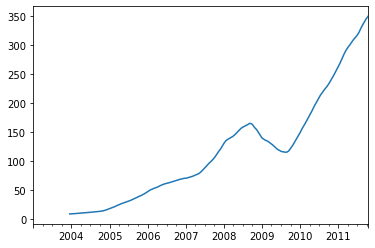

In [419]:
close_px.AAPL.rolling(250).mean().plot() # rolling operatoru resample ve group by
# gibi çalışır. 

In [425]:
appl_st250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_st250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

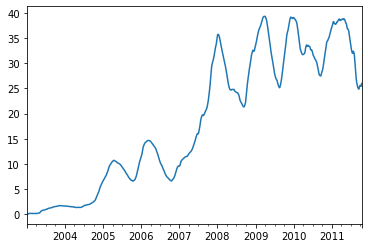

In [426]:
appl_st250.plot()

<AxesSubplot:>

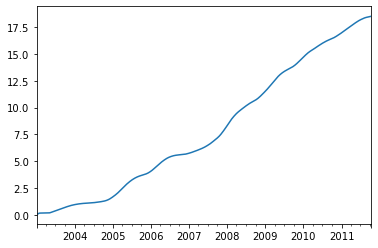

In [430]:
expanding_mean = appl_st250.expanding().mean()
expanding_mean.plot() ## expanding window mean

<AxesSubplot:>

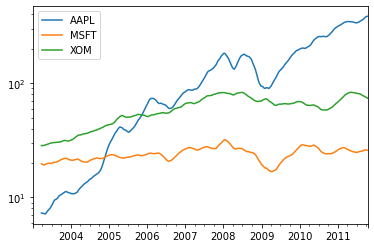

In [429]:
close_px.rolling(60).mean().plot(logy =True )

In [431]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


#### Exponentially Weighted Functions 

In [ ]:
## ağırlıklı hareketli ortalama 

In [434]:
appl_px = close_px.AAPL['2006':'2007']

In [437]:
ma60 = appl_px.rolling(30, min_periods = 20).mean() # klasik ma

In [438]:
ewma60 = appl_px.ewm(span = 30 ).mean()

<AxesSubplot:>

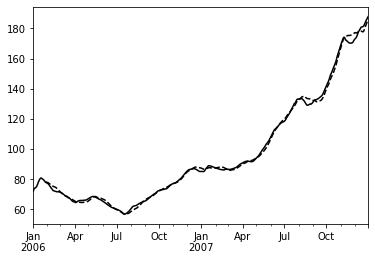

In [445]:
import matplotlib as plt
ma60.plot(style = 'k--', label = 'simple ma')
ewma60.plot(style = 'k-', label = 'ew ma')


#### Binary Moving Window Functions

In [450]:
## korelasyon ve kovaryans gibi operasyonlar 2 zaman serisi arasında kurulur.
spx_px = close_px_all['SPX']

In [456]:
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

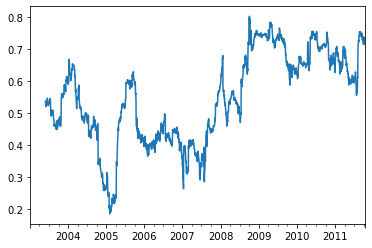

In [460]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot:>

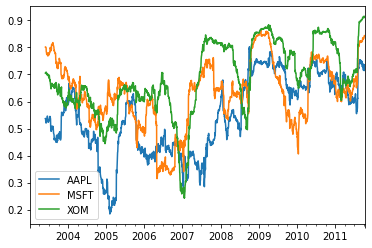

In [464]:
corr = returns.rolling(125, min_periods = 100).corr(spx_rets)
corr.plot()

### User-Defined Moving Wndow Functions

In [465]:
from scipy.stats import percentileofscore

## 12. Advanced Pandas

#### 12.1 Categorical Data

In [466]:
import numpy as np;
import pandas as pd

values = pd.Series (['apple', 'orange', 'apple', 'apple']*2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [468]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [469]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [471]:
# tekrar eden dataları göstermek için dimension gösterimi geliştirilmiştir.
values = pd.Series([0,1,0,0]*2)
dim = pd.Series(['apple', 'orange'])
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [473]:
dim

0     apple
1    orange
dtype: object

In [478]:
# take methodu ile ilk serideki valuesleri ikinci serideki dimension olarak 
# belirlediğimiz değerlerle bağdaştırabiliriz.
dim.take(values) # dim seriesine values serisi değerleri boyutlandırılıyor.
# işte burdaki elma ve portakal değişkenleri categorical değişkenler olarak anılır.

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

### Categorical Type in Pandas

In [486]:
# pandasın özel olarak Categorical olarak anılan bir data tipi vardır.
fruits = ['apple', 'orange', 'apple', 'apple']*2
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,
                  'basket_id': np.arange(N),
                  'count': np.random.randint(3,16, size = N),
                   'weight': np.random.uniform(0,4 ,size = N)},
                columns =['basket_id', 'fruit', 'count', 'weight']
                  )
df

,basket_id,fruit,count,weight
0,0,apple,7,1.659941
1,1,orange,14,2.857734
2,2,apple,6,1.186068
3,3,apple,3,0.778093
4,4,apple,15,1.362029
5,5,orange,14,0.125312
6,6,apple,11,3.528086
7,7,apple,12,1.832998


In [488]:
# burda df['fruit'] bir string objedir. Ancak bunu kategorik değişken olarak
# değiştirmek mümkündür.

fruit_cat = df['fruit'].astype('category')
fruit_cat # bu bir numpy arrayı değildir ama pandas.categorical örneğidir.

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [494]:
c = fruit_cat.values #array yapalım
type(c)

pandas.core.arrays.categorical.Categorical

In [495]:
# Categorical objelerin categorileri ve code attributeları vardır.
c.categories 

Index(['apple', 'orange'], dtype='object')

In [497]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [498]:
# diğer Python sequencleri ile categorical obje üretmek mümkündür.
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

In [500]:
# categorical data başka bir kaynaktan alınırken from_codes constructorı 
# kullanılabilir.
categories = ['foo', 'bar', 'baz']
codes = [0,1,2,0,0,1]

my_cats_2 = pd.Categorical.from_codes(codes,categories)
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

In [502]:
## from_codes içerisinde bi sıralama yoktur ancak arrayler bir sıralamayla
# gelebilir. bunun için ordered attribute ü ile belirtilmelidir.
ordered_cat = pd.Categorical.from_codes(codes,categories, ordered = True)
ordered_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [503]:
## düzensiz categorical değişkenler de as_ordered ile sıralanabilirler.
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

### Computations with Categoricals

In [508]:
# bazen categorical ile çalışırken groupby gibi fonksiyonlar daha hızlı performans
# verir.
np.random.seed(12345)
draws = np.random.randn(1000)
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [526]:
bins = pd.qcut(draws, 4 ,labels = ['q1', 'q2', 'q3', 'q4'])
#draws dizisini 4 e bölüyooruz interval üreticez.
bins #burda label kullanmasaydık q1 objeleri yerine intervaller dönecektir.

['q2', 'q3', 'q2', 'q2', 'q4', ..., 'q3', 'q2', 'q1', 'q3', 'q4']
Length: 1000
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

In [527]:
bins.codes[:10] # categorical değişkene ait codelar

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

In [531]:
# labellanmış bins sınırlar hakkında hiç bilgi vermediği için,
# istatiksel sonuçları çıkartmak için groupby kullanabiliriz.
bins = pd.Series(bins, name = 'quartile')
results = (pd.Series(draws).groupby(bins).agg(['count','min', 'max']).reset_index())
results

,quartile,count,min,max
0,q1,250,-2.949343,-0.685484
1,q2,250,-0.683066,-0.010115
2,q3,250,-0.010032,0.628894
3,q4,250,0.634238,3.927528


In [533]:
results['quartile'] # bu kolon orjinal categorical informationı tutar. sıralama dahil

0    q1
1    q2
2    q3
3    q4
Name: quartile, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

### Better performans with Categoricals

In [535]:
# Categorical değişkenler performans anlamında verim getirebilirler.
N = 100000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N//4))

categories = labels.astype('category') # labellerı categorical yapıyorum.
labels.memory_usage()

800000128

In [536]:
categories.memory_usage()

100000332

In [537]:
# tabi bu tip değişiminin tek seferlik bir maliyeti olacak.

%time _ = labels.astype('category')

Wall time: 4.58 s


### Categorical Methods

In [540]:
# categorik datalar da seriler.str methodları gibi methodları kullanabilirler.
s = pd.Series(['a', 'b', 'c', 'd']* 2)
cat_s = s.astype('category') # seriyi categorik tipe çeviriyoruz.
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [544]:
# cat attrübuteü ile categorik methodlara erişiriz.
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [545]:
cat_s.cat.categories # cat attributeü ile erişiyoruz categories e

Index(['a', 'b', 'c', 'd'], dtype='object')

In [546]:
actual_categories =[ 'a','b', 'c', 'd', 'e']

In [550]:
cat_s2 = cat_s.cat.set_categories(actual_categories) # cat attributeü kullanılarak set_categoeies
# methoduna eriştik.
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [551]:
#bi şey değişmemiş gibi görünse de value_counts() aldığımızda categorinin gelmiş olduğunu görücez
cat_s2.value_counts()

a    2
b    2
c    2
d    2
e    0
dtype: int64

In [553]:
# büyük datasetlerde hafıza kazancı için datasetler filtrelendikten sonra görünmeyen categoriler silinir.
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
cat_s3 #4 categori gelicek 2 tanesi görünmesine rağmen.

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [555]:
cat_s3.cat.remove_unused_categories() # kullanılmayan kategorileri uçurucaz.

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

### Creating dummy variables for modeling

In [556]:
# ONE-HOT encoding olarak da bilinir. her kategori için bir kolon eklenerek kategorilerin modele 
# sokulabilmesi için ve dataframe üzerine yansıtabilinmesi için bu dönüşüm yapılır.
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2 , dtype= 'category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [559]:
pd.get_dummies(cat_s) #burda 4 kategori makinenin okuyabileceği şekilde dataframe e dönüşmüş oldu.

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


### 12.2 Advanced GroupBy Use

#### Group Transform and "Unwrapped" GroupBys

In [561]:
# transform fonksiyonu ile apply fonksiyonunun farkı:
# transform fonksştonu içine fonksyion dışında parametreler alır,
# tranfrom tek bir seri ile çalışırken apply bir çok seri ile çalışır.

df = pd.DataFrame({'key': ['a', 'b', 'c'] *4 , 
                     'value': np.arange(12.) })
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [565]:
g = df.groupby('key').value # dataları gruplayarak mean aldık. ancak serinin uzunluğunun aynı kalmasın
# isteseydik transform fonksiyonunu kullanıcaktık.
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [567]:
df.groupby('key').transform(lambda x: x.mean()) # giren series ile aynı uzunlukta output vericek

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
5,6.5
6,4.5
7,5.5
8,6.5
9,4.5


In [568]:
#bir grup tranfromasyon fonksiyonu olduğunu varsayalım basit aggregate fonksyionlardan oluşan.
# Bu koşulda apply ile transform arasında herhangi bir fark olmıcaktır.

def normalize(x):
    return (x - x.mean())/ x.std()

g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [569]:
g.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

#### Grouped Time Resampling

In [573]:
# Zaman serilerinde aslında resample methoduyla yaptığımız şey; zaman aralıkları ile yapılmış gruplamadır.

N = 15 
times = pd.date_range('2017-05-20 00:00', freq = '1min' , periods = N)

df = pd.DataFrame( {'value' : np.arange(N)}
                ,
                  index = times)
df

,value
2017-05-20 00:00:00,0
2017-05-20 00:01:00,1
2017-05-20 00:02:00,2
2017-05-20 00:03:00,3
2017-05-20 00:04:00,4
2017-05-20 00:05:00,5
2017-05-20 00:06:00,6
2017-05-20 00:07:00,7
2017-05-20 00:08:00,8
2017-05-20 00:09:00,9


In [574]:
df.resample('5min').count() # 5 dakika olarak frekansını düzenledik ve count aldık

,value
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [576]:
# şimdi birden fazla zaman serisi barındıran bir Dataframe olduğunu varsayalım.
df2 = pd.DataFrame({'time': times.repeat(3),
                   'key': np.tile(['a','b','c'],N),
                    'value' : np.arange(N*3)
                   
                   })

df2[:7]

,time,key,value
0,2017-05-20 00:00:00,a,0
1,2017-05-20 00:00:00,b,1
2,2017-05-20 00:00:00,c,2
3,2017-05-20 00:01:00,a,3
4,2017-05-20 00:01:00,b,4
5,2017-05-20 00:01:00,c,5
6,2017-05-20 00:02:00,a,6


In [585]:
# burda da aynı her bir key değeri için gruplama yapmak için. TİmeGrouper objesini kullanmamız gerekir.
# timegrouper objesi kaldırılmış :( alternatif olarak işlemi resample ile gruplamak mümkün.

resampled = (df2.set_index('time').groupby('key').resample('5min').sum())

resampled

value
key time                      
a   2017-05-20 00:00:00     30
    2017-05-20 00:05:00    105
    2017-05-20 00:10:00    180
b   2017-05-20 00:00:00     35
    2017-05-20 00:05:00    110
    2017-05-20 00:10:00    185
c   2017-05-20 00:00:00     40
    2017-05-20 00:05:00    115
    2017-05-20 00:10:00    190

### 12.3 Techniques for Method Chaining

In [587]:
# Atamaları non-functional değil de methodlarla yapmak şu yüzden önemlidir: Method chaning yapmayı
# daha mümkün kılar. 

#### The Pipe Method

In [588]:
# eğer ki zincirleme yaparken bir başka modülden ya da kendi fonksiyonumuz çağırıyorsak. The pipe
# methodun kullanım sınırına girmiş oluruz.

# f(df) = df.pipe(f)

In [ ]:
g = df.groupby(['key', 'key2'])
df['col1'] = df['col1']- g.transform('mean')

## 13.0 Introduction to Modelling Libraries in Python

In [ ]:
# stats-models and scikit-learn 
# feature engineering


### 13.2 Creating Model Descriptions with Patsy

In [589]:
# patsy istatiksel modelleri tanımlamak için bir kütüphanedir.
data = pd.DataFrame({
'x0': [1, 2, 3, 4, 5],

'x1': [0.01, -0.01, 0.25, -4.1, 0.],
'y': [-1.5, 0., 3.6, 1.3, -2.]})

data


,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [590]:
# patsy üzerinde bir design matricesi oluşturmak için.
import patsy

y, X = patsy.dmatrices('y ~ x0 + x1', data ) # burda y ile x0,x1 i design matricesi olarak bölüyor
# diye düşünüyorum.

y #np.asarray(y)


DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [592]:
X # np.asarray(X) olarak yazılabilir.

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [593]:
# burdaki intercept ifadesi linear modeller için bir adet gibi düşünülebilir. + 0 ile kaldırılabilir.

patsy.dmatrices('y~x0+x1+0', data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [599]:
# Patsy objeleri direk numpy algoritmalarına yollanabilir.
coef, resid, _, _ = np.linalg.lstsq(X,y , rcond = None)

In [600]:
coef

array([[ 0.31290976],
       [-0.07910564],
       [-0.26546384]])

In [603]:
# ordinary least squares regression made with X and Y parameters. Metadata is retained in the design_info
# so you can reattach the column names when you need it.
coef = pd.Series(coef.squeeze(), index = X.design_info.column_names)
coef

Intercept    0.312910
x0          -0.079106
x1          -0.265464
dtype: float64

### Data Transformations in Patsy Formulas

In [605]:
# Patsy formülünün içine Python kodlarını yazabiliriz.

y, X = patsy.dmatrices( 'y ~ x0 + np.log(np.abs(x1) +1 )', data) #patsy formülünün içinde numpy methodları kullandık.

X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00995
          1   3                 0.22314
          1   4                 1.62924
          1   5                 0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

In [607]:
# standartize and centering işlemleri
y, X = patsy.dmatrices('y~ standardize(x0) + center(x1)', data)

X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [608]:
# yeni veriler gelmişse ve önceki metadatayla kurmak istiyorsak design matricesini
new_data = pd.DataFrame({
'x0': [6, 7, 8, 9],
'x1': [3.1, -0.5, 0, 2.3],
'y': [1, 2, 3, 4]})

new_X = patsy.build_design_matrices([X.design_info], new_data )

new_X 


[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [609]:
# eğer verileri toplamak istiyorsak. Bunu I (x0 + x1) kullanarak yapabiliriz.

y, X = patsy.dmatrices('y~ I(x0 + x1)', data)

X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

### Categorical Data and Patsy

In [ ]:
------------

### 13.3 Introduction to Statsmodels

In [ ]:
# statsmodels contains more classical statistical methods, while bayesian methods
# and machine learning models are found in other libraries.

# linear models, generalizzed linear models, and robust linear models,
# Linear mixed effects models
# Analysis of Varianve methods
# Time series processes and state space models
# Generelized method of moments



### Estimating Linear Models

In [37]:
# There are several kinds of linear regression models in statsmodels.
# array-based and formula-based is the two main different interfaces of statsmodels.

import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np


In [44]:
# to show how to use we generate a linear model from some random data

def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * np.random.randn(*size)
# For reproducibility
np.random.seed(12345)
N = 100
X = np.c_[dnorm(0, 0.4, size=N),
 dnorm(0, 0.6, size=N),
 dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]
y = np.dot(X, beta) + eps

In [46]:
X[:5]

array([[-0.12946849, -1.21275292,  0.50422488],
       [ 0.30291036, -0.43574176, -0.25417986],
       [-0.32852189, -0.02530153,  0.13835097],
       [-0.35147471, -0.71960511, -0.25821463],
       [ 1.2432688 , -0.37379916, -0.52262905]])

In [47]:
y[:5]

array([ 0.42786349, -0.67348041, -0.09087764, -0.48949442, -0.12894109])

In [48]:
# lienar model is generally fitted witj an intercept term.

X_model = sm.add_constant(X)

X_model[:5]

array([[ 1.        , -0.12946849, -1.21275292,  0.50422488],
       [ 1.        ,  0.30291036, -0.43574176, -0.25417986],
       [ 1.        , -0.32852189, -0.02530153,  0.13835097],
       [ 1.        , -0.35147471, -0.71960511, -0.25821463],
       [ 1.        ,  1.2432688 , -0.37379916, -0.52262905]])

In [51]:
# OLS class can fit an OLS linear regression
model = sm.OLS(y, X)

# fit method returns a regression results object containing estimated model,
# parametres and other diagnositcs:

results = model.fit()
results.params

array([0.17826108, 0.22303962, 0.50095093])

In [52]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.430
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              24.42
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                    7.44e-12
Time:                        15:17:40   Log-Likelihood:                         -34.305
No. Observations:                 100   AIC:                                      74.61
Df Residuals:                      97   BIC:                                      82.42
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [54]:
# now suppose all of the model parametres are in DF

data = pd.DataFrame(X, columns= ['col0', 'col1', 'col2'])
data['y'] = y

data[:5]

,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,0.427863
1,0.302910,-0.435742,-0.254180,-0.673480
2,-0.328522,-0.025302,0.138351,-0.090878
3,-0.351475,-0.719605,-0.258215,-0.489494
4,1.243269,-0.373799,-0.522629,-0.128941


## 13.4 Introduction to scikit-learn 

In [2]:
# one of the most widely used python machine learning toolkits.
# toolkit could used for classification, clustering, prediction and other common tasks.

# Titanic Daasets

import pandas as pd

In [3]:
train = pd.read_csv(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\titanic\train.csv")

test = pd.read_csv(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\titanic\test.csv")

In [4]:
train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [6]:
# statsmodels and scikit-leanr cannot be fed by missing data. 

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# typically a machine learning project like this one madkes a prediction about 
# whether a passanger would survive. firstly model is fitted on traning then 
# evaluated on a testing dataset.

# in this example
# we want to use AGE as a predictor, but first we should fill the missing data.

impute_value = train['Age'].median()

train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = test['Age'].fillna(impute_value)

In [10]:
# We use sex as a second predictor .Isfemale column should be converted 
# to the way machine can read.

train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)


In [12]:
# we decide on some model variables and create Numpy arrays:
predictors = ['Pclass', 'IsFemale', 'Age']
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values
X_train[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

In [14]:
y_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [31]:
# model's fit method is used for pass the train and test datasets to model.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train) # model is set at here.


LogisticRegression()

In [32]:
y_predict = model.predict(X_test) # finally we get our predictions from model.

y_predict[:10]



array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [33]:
#It could be computed accuracy percentage. However to compute accuracy score
#there are methods like crossvalidation in different layers.

#Some models like logictic regression have estimator classes for CV.

from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(10)
model_cv.fit(X_train, y_train)

C:\Users\Sade\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass Cs=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


LogisticRegressionCV()

In [34]:
# to do cross validation by hand it could be used cross_val_score helper function.

from sklearn.model_selection import cross_val_score

model = LogisticRegression(C=10)

scores = cross_val_score(model, X_train, y_train, cv= 4) #four layer cross validation.

scores

array([0.77578475, 0.79820628, 0.77578475, 0.78828829])